In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [6]:
print('Data does not contain null values')

Data does not contain null values


In [7]:
df.drop(labels=['nameOrig','nameDest'],axis=1,inplace=True)

In [8]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [9]:
df.rename(columns={'oldbalanceOrg':'oldbalanceOrig'},inplace=True)
df.head()

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [10]:
df[['amount','oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].min()

amount            0.0
oldbalanceOrig    0.0
newbalanceOrig    0.0
oldbalanceDest    0.0
newbalanceDest    0.0
dtype: float64

In [11]:
df[['amount','oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].max()

amount            9.244552e+07
oldbalanceOrig    5.958504e+07
newbalanceOrig    4.958504e+07
oldbalanceDest    3.560159e+08
newbalanceDest    3.561793e+08
dtype: float64

Text(0, 0.5, 'Amount')

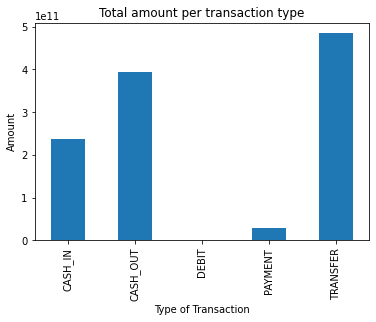

In [12]:
sums = df.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
sums.plot(kind='bar')
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount')

In [17]:
df[df.isFraud==1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

The graph above shows that TRANSFER and CASH_OUT are two most used mode of transaction and we can see that TRANSFER and CASH_OUT are also the only way in which fraud happen. Thus we will focus on this type of transactions.

<AxesSubplot:>

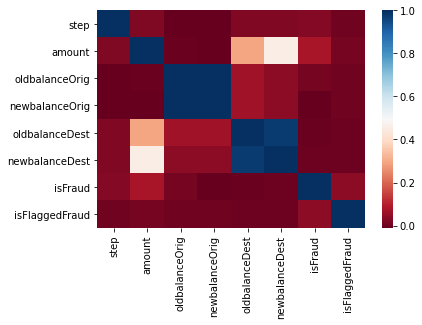

In [18]:
sns.heatmap(df.corr(),cmap='RdBu')

From this heatmap we can conclude that:
oldbalanceOrig and newbalanceOrig are highly correlated.
oldbalanceDest and newbalanceDest are highly correlated.

There is not much relation between the features, so we need to understand where the relationship between them depends on the type of transaction and amount. To do so, we need to see the heat map of fraud and nonfraud transactions differently.

In [27]:
fraud = df[df.isFraud==1]
nonfraud = df[df.isFraud==0]


fraud_counts = fraud.isFraud.count()
nonfraud_counts = nonfraud.isFraud.count()

print(fraud_counts)
print(nonfraud_counts)

8213
6354407


<AxesSubplot:>

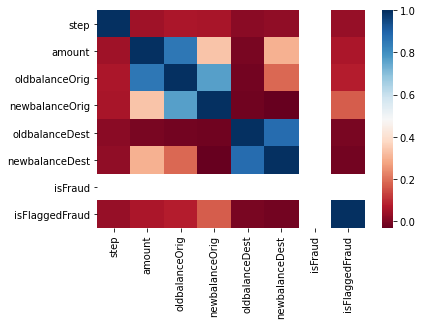

In [25]:
sns.heatmap(fraud.corr(),cmap='RdBu')

From the above heatmap we can see that there is some relation between other columns and isFlaggedFraud thus there must be relation between isFraud.

In [41]:
print(f'total number of fraud transactions are: {fraud_counts}')
print(f'total number of fraud transactions that are marked as fraud: {fraud[fraud.isFlaggedFraud==1].isFlaggedFraud.count()}')
print(f'the ratio of fraud transactions vs nonfraud transactions is 1:{nonfraud_counts//fraud_counts} ')

total number of fraud transactions are: 8213
total number of fraud transactions that are marked as fraud: 16
the ratio of fraud transactions vs nonfraud transactions is 1:773 


It means in every 773 transactions there is one Fraud Transaction is happening.

In [42]:
print(f'And Amount lost because of these fraud transactions is {fraud.amount.sum()}$')

And Amount lost because of these fraud transactions is 12056415427.839998$


In [49]:
pie = fraud.groupby('isFlaggedFraud').sum()

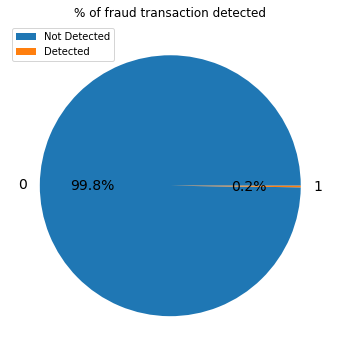

In [50]:
f, axes = plt.subplots(1,1, figsize=(6,6))
axes.set_title("% of fraud transaction detected")
pie.plot(kind='pie',y='isFraud',ax=axes, fontsize=14,shadow=False,autopct='%1.1f%%');
axes.set_ylabel('');
plt.legend(loc='upper left',labels=['Not Detected','Detected'])
plt.show()

Let's move towards data cleaning and mahichne learning model

In [56]:
data = pd.read_csv('Fraud.csv')

In [57]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [58]:
data.shape

(6362620, 11)

In [59]:
data.drop(['isFlaggedFraud','nameOrig','nameDest'],axis=1,inplace=True)

In [60]:
data.rename(columns={'oldbalanceOrg':'oldbalanceOrig'},inplace=True)
data.head()

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [62]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [63]:
data = data.replace(to_replace={'PAYMENT':0, 'TRANSFER':1, 'CASH_OUT':2, 'DEBIT':3, 'CASH_IN':4})

In [64]:
data.head()

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,0,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,0,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,1,181.00,181.0,0.00,0.0,0.0,1
3,1,2,181.00,181.0,0.00,21182.0,0.0,1
4,1,0,11668.14,41554.0,29885.86,0.0,0.0,0


In [71]:
X = data.drop('isFraud',axis=1)
y = data['isFraud']

In [72]:
X.head()

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,0,9839.64,170136.0,160296.36,0.0,0.0
1,1,0,1864.28,21249.0,19384.72,0.0,0.0
2,1,1,181.00,181.0,0.00,0.0,0.0
3,1,2,181.00,181.0,0.00,21182.0,0.0
4,1,0,11668.14,41554.0,29885.86,0.0,0.0


In [73]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split

In [74]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=100)

In [81]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(train_X,train_y)
predictions = model.predict(test_X)

In [83]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy = accuracy_score(test_y, predictions)
recall = recall_score(test_y, predictions, average='weighted')
precision = precision_score(test_y, predictions, average='weighted')
f1 = f1_score(test_y, predictions, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.9997935860803673
Recall: 0.9997935860803673
Precision: 0.9997896388041579
F1 Score: 0.9997876467649055


#  Data cleaning including missing values, outliers and multi-collinearity. 

There was not any missing value or outlier in the dataset.

#  Describe your fraud detection model in elaboration.

XGBoost (Extreme Gradient Boosting) is a popular algorithm used in fraud detection models. It is a type of ensemble learning method that combines the predictions of several weak models to produce a more accurate final prediction.

XGBoost is a variant of gradient boosting and is designed to improve upon the limitations of the traditional gradient boosting algorithm. It uses a combination of regularization techniques and parallel processing to speed up the training process and improve the accuracy of the model.

# How did you select variables to be included in the model?

I excluded the columns named 'isFlaggedFraud', 'nameOrig' and 'nameDest'. Because they were not making sense for model. nameOrigin and nameDest were just simply names and the 'isFlaggedFraud' was very useful for understanding of data but was not useful for model.

#  Demonstrate the performance of the model by using best set of tools. 

Accuracy: 0.9997935860803673
Recall: 0.9997935860803673
Precision: 0.9997896388041579
F1 Score: 0.9997876467649055

#  What are the key factors that predict fraudulent customer?

The key factors that can help in predicting fraudulent customers are:

Type of transaction: Certain types of transactions, such as 'TRANSFER' or 'CASH_OUT', may be more likely to be associated with fraudulent activity.

Amount of transaction: Large transactions or transactions that are significantly larger or smaller than the customer's usual transactions may be more likely to be fraudulent.

Balance changes: Unusually large or frequent changes in the sender's or recipient's account balance may indicate fraudulent activity.

Origin and destination accounts: Transactions that involve accounts that are newly created or have a history of fraudulent activity may be more likely to be fraudulent.

Time of transaction: Transactions that occur outside of normal business hours or during holidays may be more likely to be fraudulent.

Flagged transactions: If there is a feature that flags suspicious transactions, such as the isFlaggedFraud column in the provided data, this can also be a strong predictor of fraudulent activity.

# Do these factors make sense? If yes, How? If not, How not?

Yes, these factors do make sense as they are all potential indicators of fraudulent activity in financial transactions.

The type of transaction is important because certain types of transactions may be more prone to fraudulent activity, such as transferring funds from one account to another or cashing out large amounts of money.

The amount of the transaction is also important, as it can be an indicator of suspicious activity if it is significantly larger or smaller than the customer's usual transaction amounts.

Balance changes are also relevant because unusual changes in account balances, such as large or frequent deposits or withdrawals, can be indicative of fraudulent activity.

The origin and destination accounts can also provide important information about the likelihood of fraud. New accounts or accounts with a history of fraudulent activity are often used in fraudulent transactions.

The time of the transaction is another factor that can be important in predicting fraudulent activity. Transactions that occur outside of normal business hours or during holidays may be more likely to be fraudulent, as this is when there may be fewer people monitoring the transactions.

Finally, flagged transactions are a strong indicator of potential fraud, as they have already been identified as suspicious by the system. By analyzing these factors and using machine learning algorithms, we can build models that can accurately identify potentially fraudulent transactions and help prevent financial losses.

# What kind of prevention should be adopted while company update its infrastructure?


When updating the infrastructure for a fraudulent transaction detection system, it's important to take the following prevention measures to ensure that the system remains secure and effective:

Use secure and up-to-date software: The fraudulent transaction detection system should be built using secure software frameworks and libraries that are regularly updated to fix security vulnerabilities.

Protect the data: The fraudulent transaction detection system must be designed to protect sensitive data, such as account numbers and transaction details. This can be achieved through encryption, access controls, and secure data storage protocols.

Implement access controls: Access to the fraudulent transaction detection system should be strictly controlled and limited to authorized personnel. Multi-factor authentication and role-based access controls can be implemented to ensure that only those with the proper credentials can access the system.

Monitor system activity: Ongoing monitoring of system activity can help to detect and prevent potential security threats. This includes monitoring system logs and implementing intrusion detection and prevention systems.

Conduct regular security testing: Regular security testing, such as penetration testing and vulnerability assessments, can help to identify and address any security weaknesses in the fraudulent transaction detection system.

Ensure regulatory compliance: The fraudulent transaction detection system must comply with all relevant regulations and standards, such as PCI-DSS, to ensure that it meets industry best practices for security and data protection.

By adopting these prevention measures, a company can help to ensure the security and effectiveness of its fraudulent transaction detection system during an update and minimize the risk of security breaches and data loss.

# Assuming these actions have been implemented, how would you determine if they work?

To determine if the prevention measures implemented for a fraud detection system are effective, several methods can be used:

Regular testing: The fraud detection system can be regularly tested using various methods such as penetration testing, vulnerability assessment, and simulated attacks to identify any potential security vulnerabilities or weaknesses. Any issues discovered during testing can be addressed promptly to ensure that the system remains secure.

Monitoring and analysis: Ongoing monitoring of the system can help to identify potential fraud incidents and track the effectiveness of the prevention measures implemented. The system should be able to identify any fraudulent transactions and alert the relevant personnel for further investigation. Analysis of the system's performance can also help to identify any areas where improvement is needed.

Incident response plan: An incident response plan should be in place to address any security incidents that occur despite the prevention measures in place. The plan should include a step-by-step guide for detecting, containing, and mitigating any potential security threats.

Compliance audits: Compliance audits can be conducted by third-party auditors to ensure that the fraud detection system is meeting regulatory requirements and industry best practices.

By using these methods, a company can determine the effectiveness of the prevention measures implemented for its fraud detection system. It's important to continually review and improve the system to ensure that it remains secure and effective over time.